# Quantlib - Tutorial

In [103]:
from src import quantlib as ql
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import pandas as pd
import matplotlib.pyplot as plt

### Financial price time series 

In [4]:
# Example tickers and dates
tickers   = ["MSFT","AAPL","AMZN","GOOG","KO","GE","IBM"]
startdate = "2011-12-31" 
enddate   = "2022-12-31" 

Get "Adj Close" prices from **yahoo finance**

In [17]:
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close")
assets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-03,12.500195,8.951500,86.231941,16.573130,117.096062,24.902027,21.413065
2012-01-04,12.567370,8.875500,87.171333,16.644611,116.618385,24.745815,21.917002
2012-01-05,12.706892,8.880500,87.124344,16.413727,116.065277,24.628647,22.140963
2012-01-06,12.839727,9.130500,87.594002,16.189817,114.732758,24.472433,22.484917
2012-01-09,12.819362,8.928000,88.580322,15.503389,114.135651,24.472433,22.188957
...,...,...,...,...,...,...,...
2022-12-23,131.658981,85.250000,63.848557,89.809998,139.931198,63.820000,238.133545
2022-12-27,129.831772,83.040001,64.668228,87.930000,140.691849,64.209999,236.367981
2022-12-28,125.847855,81.820000,63.989071,86.459999,138.320984,63.570000,233.944031


### Arithmetic returns 

In [87]:
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
rets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-02-01,0.188310,-0.075859,0.018172,0.065746,0.021443,0.034503,0.074839
2012-03-01,0.105284,0.126996,0.062862,0.037186,0.064721,0.059404,0.023074
2012-04-01,-0.025969,0.145129,-0.024414,-0.056749,-0.007525,0.038764,-0.007440
2012-05-01,-0.010702,-0.081889,-0.025025,-0.039663,-0.068476,-0.020833,-0.088382
2012-06-01,0.010852,0.072519,0.091671,-0.001360,0.018141,0.046300,0.054838
...,...,...,...,...,...,...,...
2022-08-01,-0.032552,-0.060615,-0.006359,-0.064215,-0.017891,-0.038336,-0.068640
2022-09-01,-0.119756,-0.108622,-0.156999,-0.119102,-0.063395,-0.092205,-0.107376
2022-10-01,0.109552,-0.093451,0.258384,-0.015497,0.163959,0.076158,-0.003306


### Log-returns

In [16]:
lrets = ql.compute_logreturns(assets, mpor=1, ascending=True, dropna=True)
lrets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-04,0.005360,-0.008526,0.010834,0.004304,-0.004087,-0.006293,0.023261
2012-01-05,0.011041,0.000563,-0.000539,-0.013969,-0.004755,-0.004746,0.010167
2012-01-06,0.010400,0.027763,0.005376,-0.013735,-0.011547,-0.006363,0.015415
2012-01-09,-0.001588,-0.022428,0.011197,-0.043324,-0.005218,0.000000,-0.013250
2012-01-10,0.003574,0.004359,-0.007451,0.001092,-0.001544,0.005931,0.003598
...,...,...,...,...,...,...,...
2022-12-23,-0.002802,0.017274,0.000245,0.017409,0.005451,0.007550,0.002265
2022-12-27,-0.013976,-0.026266,0.012756,-0.021155,0.005421,0.006092,-0.007442
2022-12-28,-0.031166,-0.014801,-0.010558,-0.016859,-0.016995,-0.010017,-0.010308


### Single compounding of returns

In [21]:
ql.compound(rets)

AAPL     9.378393
AMZN     8.383902
GE      -0.241466
GOOG     4.353847
IBM      0.188601
KO       1.554411
MSFT    10.171722
dtype: float64

That is, for example, all together the overall returns of AAPL have been about 938%. Or, for GE, it has been about -24%.

This is equivalent to compute the return between the last and the first corresponding price series:

In [36]:
tt = "AAPL"
rr = assets.loc[ assets[tt].index[-1] , tt] / assets.loc[ assets[tt].index[0] , tt] - 1
print(f"{tt} overall compounded return:\t{rr*100:.0f}%")

tt = "GE"
rr = assets.loc[ assets[tt].index[-1] , tt] / assets.loc[ assets[tt].index[0] , tt] - 1
print(f"{tt} overall compounded return:\t{rr*100:.0f}%")

AAPL overall compounded return:	938%
GE overall compounded return:	-24%


### Compounding returns

Cumulative compounding returns. To see what an initial (e.g., investment) price/amount would have resulted in using all available returns history.

In [49]:
# Compute returns leaving the first mpor row of nans
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=False)

ival = 1
ql.compound_returns(rets, start=ival).fillna(ival)

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,0.991510,1.010894,1.004313,0.995921,0.993727,1.023534
2012-01-05,1.016536,0.992068,1.010349,0.990382,0.991197,0.989022,1.033993
2012-01-06,1.027162,1.019997,1.015795,0.976871,0.979817,0.982749,1.050056
2012-01-09,1.025533,0.997375,1.027233,0.935453,0.974718,0.982749,1.036235
...,...,...,...,...,...,...,...
2022-12-23,10.532555,9.523544,0.740428,5.419013,1.195012,2.562844,11.120946
2022-12-27,10.386380,9.276658,0.749934,5.305576,1.201508,2.578505,11.038494
2022-12-28,10.067672,9.140368,0.742058,5.216878,1.181261,2.552804,10.925294


That is, 1$ invested in AAPL trasnformed into 10.37 after 10 years. 
This is equivalent to the compounded return of about 938% seen previously


### Annualizing returns

Computation of the return-per-year, or **annualized return**.

Let $R$ be the series of, e.g., daily returns. The total length series is $n$.
Also, let $R_{c}$ be the compounded (total) return of the series (see above **.compound_returns**).
Then, the annualized return, $R_{y}$, is calculated as:
$$
R_{y} = (1 + R_{c})^{p/n} - 1,
\quad\text{where}\quad
p =
\begin{cases}
252  	& \text{for daily returns},\\
52   	& \text{for weekly returns},\\
12  	& \text{for monthly returns},\\
\text{and so on}
\end{cases}
$$
The variable $p$ is the **periods-per-year** and denotes the number of **trading** days in a year.

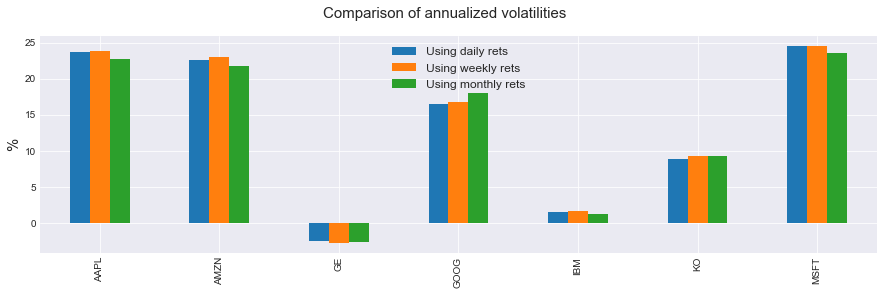

In [122]:
# Using daily prices/returns, 1d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
drs = ql.annualize_returns(rets, ppy=252)

# Using weekly prices/returns, 5d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="5d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
wrs = ql.annualize_returns(rets, ppy=52)

# using monthly prices/returns, 1mo
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1mo")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
mrs = ql.annualize_returns(rets, ppy=12)

# Annualized volatilities
rrs = pd.DataFrame({"Using daily rets"  : drs,
                    "Using weekly rets" : wrs,
                    "Using monthly rets": mrs})

# Plot
fig, ax = plt.subplots(1,1,figsize=(15,4))
(rrs* 100).plot.bar(ax=ax,grid=True)
fig.suptitle("Comparison of annualized returns", fontsize=15)
ax.set_xlabel("",fontsize=18)
ax.set_ylabel("Percent (%)",fontsize=15)
ax.legend(fontsize=12)
plt.show()

### Semi-Volatility

Computation of the semi-volatility, i.e., the volatility of negative returns

In [130]:
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)

In [131]:
# Volatility 
rets.std()

AAPL    0.018335
AMZN    0.020491
GE      0.020440
GOOG    0.016851
IBM     0.014436
KO      0.011169
MSFT    0.016714
dtype: float64

In [132]:
# (Negative) Semi-Volatility 
ql.semistd(rets)

AAPL    0.013329
AMZN    0.014430
GE      0.014990
GOOG    0.012151
IBM     0.011583
KO      0.008977
MSFT    0.012224
dtype: float64

If *negative=False* is passed, then it computes the semi-volatility of positive returns

### Annualizing volatility

Similarly to the annualized returns, the **annualized volatility** can be computed too (required if one need to compare volatilities of different stocks obtained from different types of returns).

The annualized volatility, $\sigma_y$, is a function of the square root of the time interval used to compute returns:

$$
\sigma_{y} := \sigma_p \sqrt{p},
\quad\text{where}\quad
p =
\begin{cases}
252  	& \text{for daily returns},\\
52   	& \text{for weekly returns},\\
12  	& \text{for monthly returns},\\
\text{and so on}
\end{cases}
$$

Note that this annualization is *justified* only if the returns used to compute the volatility are log-returns. 
This is because it is typically assumed that stock prices are log-normally distributed, which, in turns, 
implies that log-returns are normally distributed with mean $(\mu-\sigma^2/2)dt$ and variance $\sigma^2dt$.
Hence, the volatility is given by $\sigma\sqrt{dt}$ and one can approximate the volatility for larger period of time by $\sigma\sqrt{dt}$.

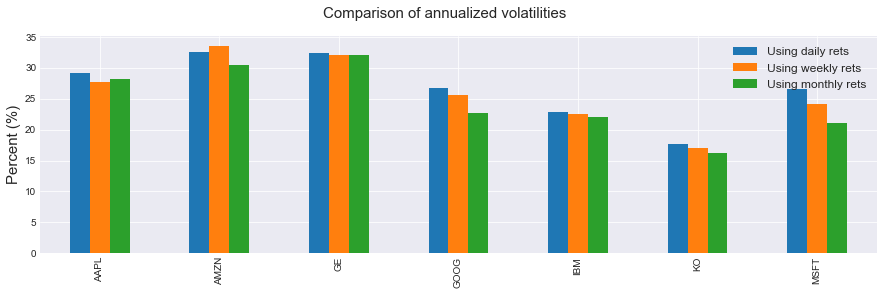

In [133]:
# Using daily prices/returns, 1d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
dvol = ql.annualize_std(rets, ppy=252)

# Using weekly prices/returns, 5d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="5d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
wvol = ql.annualize_std(rets, ppy=52)

# using monthly prices/returns, 1mo
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1mo")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
mvol = ql.annualize_std(rets, ppy=12)

# Annualized volatilities
vols = pd.DataFrame({"Using daily rets"  : dvol,
                     "Using weekly rets" : wvol,
                     "Using monthly rets": mvol})

# Plot
fig, ax = plt.subplots(1,1,figsize=(15,4))
(vols* 100).plot.bar(ax=ax,grid=True)
fig.suptitle("Comparison of annualized volatilities", fontsize=15)
ax.set_xlabel("",fontsize=18)
ax.set_ylabel("Percent (%)",fontsize=15)
ax.legend(fontsize=12)
plt.show()

### Drawndown

In [135]:
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)

Computing the **drawdown** absolute (*percent=False*) and relative (*percent=True*) series 

In [162]:
maxd = False
dd = ql.drawdown(assets, rets=False, maxd=maxd, percent=False)  # Absolute drawdowns
dd_p = ql.drawdown(assets, rets=False, maxd=maxd, percent=True) # Relative drawdown

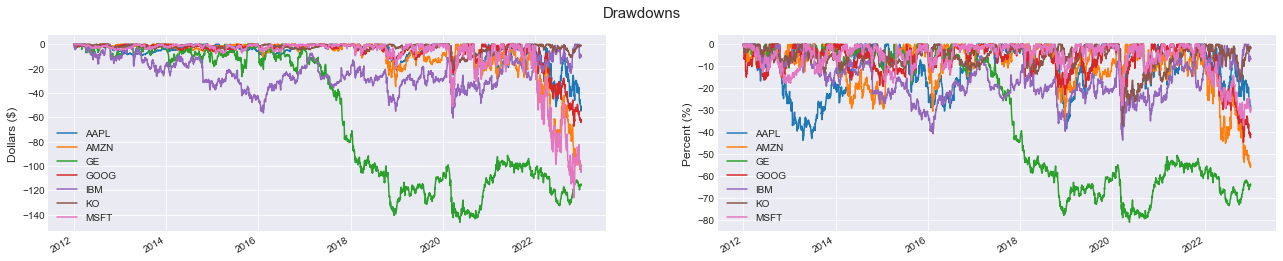

In [164]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(22,4))
ax = ax.flatten()
fig.suptitle("Drawdowns", fontsize=15)

n = 0
dd.plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=18)
ax[n].set_ylabel("Dollars ($)",fontsize=12)
ax[n].legend(fontsize=10)

n = 1
(dd_p * 100).plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=18)
ax[n].set_ylabel("Percent (%)",fontsize=12)
ax[n].legend(fontsize=10)
plt.show()

In [ ]:
Computing the **maximum drawdown** absolute (*percent=False*) and relative (*percent=True*) series 

In [157]:
maxd = True
mdd = ql.drawdown(assets, rets=False, maxd=maxd, percent=False)  # Maximum absolute drawdowns
mdd_p = ql.drawdown(assets, rets=False, maxd=maxd, percent=True) # Maximum relative drawdown

In [158]:
mdd

AAPL    -54.835999
AMZN   -104.750496
GE     -146.307060
GOOG    -67.219002
IBM     -60.553032
KO      -20.248386
MSFT   -125.961411
dtype: float64

In [159]:
mdd_p

AAPL   -0.437972
AMZN   -0.561453
GE     -0.811914
GOOG   -0.446018
IBM    -0.437200
KO     -0.369875
MSFT   -0.371485
dtype: float64

In [30]:
#qt.drawdown(assets, rets=False, maxd=True, percent=True)

In [31]:
#qt.drawdown(rets, rets=True, maxd=False, percent=True).plot()

In [32]:
#qt.drawdown(rets, rets=True, maxd=True, percent=True)

In [33]:
#qt.drawup(assets).plot()

In [34]:
#qt.is_normal(rets, siglev=0.05)

#### Value-at-Risk estimators
Methods returning the (1-CL)% Value-at-Risk-based estimator for a fixed CL **Confidence Level**.

In [106]:
# Confidence level
CL = 99/100

**Value-at-Risk**: .var

Returns the (1-CL)% VaR figure corresponding to the input Confidence Level (i.e., the (1-CL) quantile).\
It uses pd.quantile method, interpolation is used by default.

In [107]:
# pd.Series or single column pd.DataFrame
s = rets[["AAPL"]] # or rets["AAPL"]
ql.var(s, CL=CL)

AAPL   -0.048387
dtype: float64

In [108]:
# pd.DataFreme
ql.var(rets, CL=CL)

AAPL   -0.048387
AMZN   -0.056431
GE     -0.059087
GOOG   -0.047631
IBM    -0.043399
KO     -0.031608
MSFT   -0.042652
dtype: float64

**Value-at-Risk under Normal distribution**: .var_normal

Returns the VaR figure corresponding to the input Confidence Level by assuming normality of 
the return series.

Let $\mu$ and $\sigma$ be the mean and the volatility of the returns $R$ 
and assume that $R\sim N(\mu,\sigma)$. 
If $X\sim N(0,1)$, then $R = \mu + X \sigma$.
In this way, for computing the (1-CL)-quantile of $R$, it is suffices to compute 
the (1-CL)-quantile of the stardard normal distribution. 

By definition, the (1-CL)-quantile is the number $z_{CL}$ such that 
$\mathbb{P}(R \leq z_{CL}) = 1-CL$.
Hence: 

$$
1-CL 
= \mathbb{P}(R \leq z_{CL}) 
= \mathbb{P}(\mu+ X\sigma \leq z_{CL}) 
= \mathbb{P}\left(X \leq \frac{z_{CL}-\mu}{\sigma}\right) 
= \Phi\left( \frac{z_{CL}-\mu}{\sigma} \right)
\qquad\Longrightarrow\qquad
z_{CL} = \mu + \Phi^{-1}(1-{CL})\sigma 
$$
where $\Phi^{-1}(1-{CL})$ is the (1-CL)-quantile of the standard normal distribution.

In [109]:
ql.var_normal(rets, CL=CL)

AAPL   -0.041640
AMZN   -0.046651
GE     -0.047442
GOOG   -0.038453
IBM    -0.033415
KO     -0.025581
MSFT   -0.037870
dtype: float64

**Value-at-Risk Cornish-Fisher method**: .var_normal(cl=True)

This is a modifed version of the parametric normal method for quantile computation (semi-parametric method).
The method relates quantilies of **non Gaussian** distribution with the quantiles of the Gaussian as follows: 
$$
\tilde{z}_{CL} 
= z_{CL} + \frac{1}{6}(z_{CL}^2 - 1)S 
+ \frac{1}{24}(z_{CL}^3 - 3 z_{CL})(K-3) 
- \frac{1}{36}(2z_{CL}^3 - 5 z_{CL})S^2
$$
where $\tilde{z}_{CL}$, $S$, and $K$ denote the (1-CL)-quantile, 
the skewness, and the kurtosis of the non-Gaussian distribution 
(say, our returns series), respectively, 
and $z_{CL}$ is the (1-CL)-quantile of the standard normal distribution. 
If the input return distribution is, indeed, normal, 
then $S=0$ and $K=3$ and so $\tilde{z}_{CL}$ would be equal to $z_{CL}$.

Then, the VaR in this case will be equalt to $\mu + \tilde{z}_{CL}\sigma$.

In [110]:
ql.var_normal(rets, CL=CL, cf=True)

AAPL   -0.066104
AMZN   -0.075270
GE     -0.082082
GOOG   -0.066826
IBM    -0.072159
KO     -0.054817
MSFT   -0.071164
dtype: float64

**Expected Shortfall**: .es

Returns the (1-CL)% Expected Shortfall figure corresponding to the input Confidence Level.
This is defined as the average of distribution returns worst than the (1-CL)% VaR.

In [111]:
ql.es(rets, CL=CL)

AAPL   -0.068166
AMZN   -0.074504
GE     -0.081151
GOOG   -0.060446
IBM    -0.065567
KO     -0.049247
MSFT   -0.061645
dtype: float64

Comparison

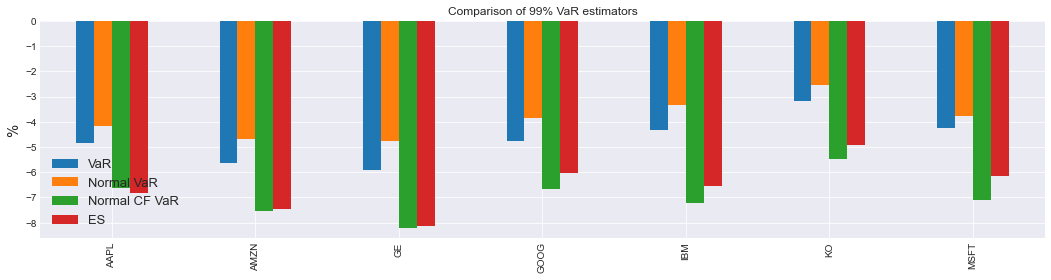

In [122]:
VaRs = pd.DataFrame({"VaR": ql.var(rets, CL=CL),
                     "Normal VaR": ql.var_normal(rets, CL=CL, cf=False),
                     "Normal CF VaR": ql.var_normal(rets, CL=CL, cf=True),
                     "ES": ql.es(rets, CL=CL)})

title = f"Comparison of {CL*100:.0f}% VaR estimators"
(VaRs * 100).plot.bar(figsize=(18,4), grid=True, title=title)
plt.ylabel("%", fontsize=15)
plt.legend(fontsize=13)
plt.show()

#### Summary statistics

In [124]:
ql.summary_stats(rets, CL=CL)

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
(Ann.) Returns,0.237492,0.226191,-0.024856,0.165097,0.015860,0.089164,0.245821
(Ann.) Std,0.291064,0.325284,0.324477,0.267496,0.229157,0.177299,0.265326
Skewness,-0.072334,0.412764,0.166840,0.423256,-0.539957,-0.664707,0.034956
Kurtosis,8.487689,10.548673,10.819122,11.823880,13.250569,12.816791,11.632546
VaR 0.99,-0.048387,-0.056431,-0.059087,-0.047631,-0.043399,-0.031608,-0.042652
Normal VaR 0.99,-0.041640,-0.046651,-0.047442,-0.038453,-0.033415,-0.025581,-0.037870
Normal CF VaR 0.99,-0.066104,-0.075270,-0.082082,-0.066826,-0.072159,-0.054817,-0.071164
ES 0.99,-0.068166,-0.074504,-0.081151,-0.060446,-0.065567,-0.049247,-0.061645
Max Drawdown,-0.437972,-0.561453,-0.811914,-0.446018,-0.437200,-0.369875,-0.371485
Minimum,-0.128647,-0.140494,-0.151592,-0.111008,-0.128507,-0.096725,-0.147391


In [39]:
#rets.kurt()
#qt.kurtosis(rets, excess=True)

In [122]:
#qt.sample_cov(rets)
#qt.cc_cov(rets)
#qt.shrinkage_cov(rets, delta=0.3)